In [1]:
import numpy as np
from turabnet.train import train
from turabnet.nn import NeuralNet
from turabnet.layers import Linear, Tanh, Sigmoid
from turabnet.data import BatchIterator
from turabnet.loss import MSE
from turabnet.optim import SGD
from nn_utils import plot_decision_boundary, plot_loss
import matplotlib.pyplot as plt

### XOR Gate

|| Inputs | Outputs   ||
| ---- | ---- |
| X | Y | Z | 1-hot |
| 0 | 0 | 0 | [1 0 ]   |
| 1 | 0 | 1 | [0 1 ]   |
| 0 | 1 | 1 | [0 1 ]   |
| 1 | 1 | 0 | [1 0 ]   |

In [2]:
# Binary
inputs = np.array([
    [0, 0],
    [1, 0],
    [0, 1],
    [1, 1]
])

# XOR: 1-hot
targets = np.array([
    [1, 0],
    [0, 1],
    [0, 1],
    [1, 0]
])

### Train Model

In [4]:
net = NeuralNet([
        Linear(input_size=2, output_size=2),
        Tanh(),
        Linear(input_size=2, output_size=2),
        Sigmoid()
    ])

losses =  train(net=net, inputs=inputs, targets=targets, num_epochs=1000,
                    iterator=BatchIterator(batch_size=32, shuffle=True),
                    loss=MSE(),
                    optimizer=SGD(lr=0.5),
                    verbose=True, print_every=200)

# Testing
predictions = net.forward(inputs)


print("\n# Lables")
for x, y_pred, y_true in zip(inputs, predictions, targets):
    print(f"x: {x} y_pred: {np.argmax(y_pred)} y_true: {np.argmax(y_true)}")

epoch:   1 loss: 0.287
epoch: 200 loss: 0.128
epoch: 400 loss: 0.126
epoch: 600 loss: 0.126
epoch: 800 loss: 0.125
epoch: 1000 loss: 0.125

# Lables
x: [0 0] y_pred: 0 y_true: 0
x: [1 0] y_pred: 1 y_true: 1
x: [0 1] y_pred: 0 y_true: 1
x: [1 1] y_pred: 1 y_true: 0


### Try different learning rate and hidden units

In [5]:
lr = [0.005, 0.05, 0.5]
h = [2, 3]

cache = []
for _lr in lr:
    for _h in h:
        _net = NeuralNet([
            Linear(input_size=2, output_size=_h),
            Tanh(),
            Linear(input_size=_h, output_size=2),
            Sigmoid()
        ])

        _losses =  train(net=_net, 
                         inputs=inputs, targets=targets, num_epochs=1000,
                         iterator=BatchIterator(batch_size=32, shuffle=True),
                         loss=MSE(),
                         optimizer=SGD(lr=_lr),
                         verbose=False, print_every=200)

        cache.append((_net, _losses, _h, _lr))
print("end of training")

end of training


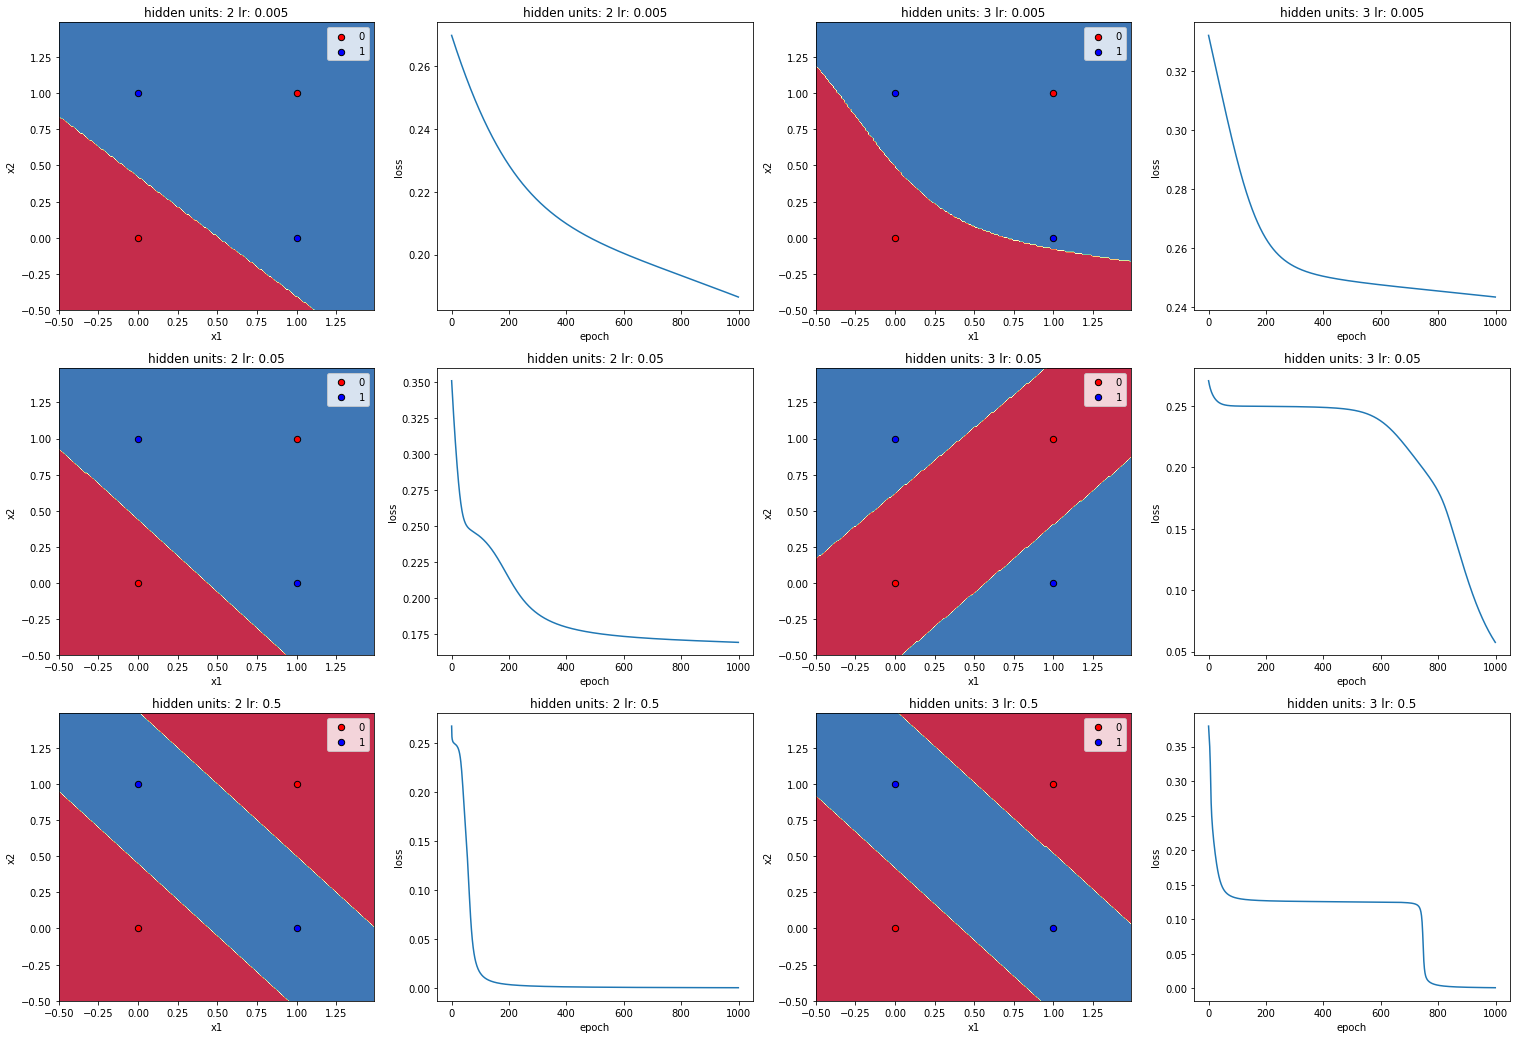

In [6]:
plt.figure(figsize=(26, 18))
for i, (_net, _losses, _h, _lr) in enumerate(cache):
    
    plt.subplot(3,4,2*i+1)
    plot_decision_boundary(inputs, np.argmax(targets, axis=1), lambda x: np.argmax(_net.forward(x), axis=1))
    plt.title(f"hidden units: {_h} lr: {_lr}")
    
    plt.subplot(3, 4, 2*i+ 2)
    plot_loss(_losses)
    plt.title(f"hidden units: {_h} lr: {_lr}")

plt.show()

### Summary:
- XOR outputs are not linearly separable. hence we need non-linear activation function to model the XOR gate
- Since it's outputs are non-linear  and there are four different states in XOR gate, we need atleast 4 neurons to model a XOR gate.
- we can see the performance at different learning rate and hidden units.
- as we use random weights to initialize the parameters, the output will differ at each run